In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read the dataset, display the first five rows
df = pd.read_csv("Loan_Default.csv")
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
#columns in the dataset
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [5]:
#information columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [6]:
#shape of the dataset
df.shape

(148670, 34)

In [7]:
#statistical information
df.describe().round(2)

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.00,148670.0,148670.00,112231.00,112031.00,109028.00,148629.00,133572.00,139520.00,148670.00,133572.00,148670.00,124549.00
mean,99224.50,2019.0,331117.74,4.05,0.44,3225.00,335.14,497893.47,6957.34,699.79,72.75,0.25,37.73
std,42917.48,0.0,183909.31,0.56,0.51,3251.12,58.41,359935.32,6496.59,115.88,39.97,0.43,10.55
min,24890.00,2019.0,16500.00,0.00,-3.64,0.00,96.00,8000.00,0.00,500.00,0.97,0.00,5.00
25%,62057.25,2019.0,196500.00,3.62,0.08,581.49,360.00,268000.00,3720.00,599.00,60.47,0.00,31.00
50%,99224.50,2019.0,296500.00,3.99,0.39,2596.45,360.00,418000.00,5760.00,699.00,75.14,0.00,39.00
75%,136391.75,2019.0,436500.00,4.38,0.78,4812.50,360.00,628000.00,8520.00,800.00,86.18,0.00,45.00
max,173559.00,2019.0,3576500.00,8.00,3.36,60000.00,360.00,16508000.00,578580.00,900.00,7831.25,1.00,61.00


In [8]:
#check for duplicate rows
print("Number of duplicate rows: ", len(df[df.duplicated()]))

Number of duplicate rows:  0


In [9]:
#check for null values
df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [10]:
#drop unnecessary columns
df.drop(['ID','year','term','Interest_rate_spread',
         'property_value','submission_of_application'],axis=1,inplace=True)
df

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,...,1740.0,EXP,758,CIB,25-34,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,...,4980.0,EQUI,552,EXP,55-64,NaN,North,direct,1,NaN
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,...,9480.0,EXP,834,CIB,35-44,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,...,11880.0,EXP,587,CIB,45-54,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,...,10440.0,CRIF,602,EXP,25-34,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,...,7860.0,CIB,659,EXP,55-64,71.792763,south,direct,0,48.0
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,...,7140.0,CIB,569,CIB,25-34,74.428934,south,direct,0,15.0
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,...,6900.0,CIB,702,EXP,45-54,61.332418,North,direct,0,49.0
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,...,7140.0,EXP,737,EXP,55-64,70.683453,North,direct,0,29.0


In [11]:











































































































































#detect outliers
def detect_outliers(data):
    threshold = 3
    for i in data.columns:
        if data[i].dtype=='float64' or data[i].dtype=='int64':
            mean = np.mean(data[i])
            std = np.std(data[i])
            z_scores = [(y - mean) / std for y in data[column]]
            data = data[np.abs(z_scores) <= threshold]
        return data
df = detect_outliers(df)
df


,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,...,1740.0,EXP,758,CIB,25-34,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,...,4980.0,EQUI,552,EXP,55-64,NaN,North,direct,1,NaN
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,...,9480.0,EXP,834,CIB,35-44,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,...,11880.0,EXP,587,CIB,45-54,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,...,10440.0,CRIF,602,EXP,25-34,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,...,7860.0,CIB,659,EXP,55-64,71.792763,south,direct,0,48.0
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,...,7140.0,CIB,569,CIB,25-34,74.428934,south,direct,0,15.0
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,...,6900.0,CIB,702,EXP,45-54,61.332418,North,direct,0,49.0
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,...,7140.0,EXP,737,EXP,55-64,70.683453,North,direct,0,29.0


In [12]:
#statistical information
df.describe().round(2)

,loan_amount,rate_of_interest,Upfront_charges,income,Credit_Score,LTV,Status,dtir1
count,148670.00,112231.00,109028.00,139520.00,148670.00,133572.00,148670.00,124549.00
mean,331117.74,4.05,3225.00,6957.34,699.79,72.75,0.25,37.73
std,183909.31,0.56,3251.12,6496.59,115.88,39.97,0.43,10.55
min,16500.00,0.00,0.00,0.00,500.00,0.97,0.00,5.00
25%,196500.00,3.62,581.49,3720.00,599.00,60.47,0.00,31.00
50%,296500.00,3.99,2596.45,5760.00,699.00,75.14,0.00,39.00
75%,436500.00,4.38,4812.50,8520.00,800.00,86.18,0.00,45.00
max,3576500.00,8.00,60000.00,578580.00,900.00,7831.25,1.00,61.00


In [13]:
#fill missing values
for i in df.columns:       
    if df[i].dtype=='float64' or df[i].dtype=='int64':
        df[i].fillna(df[i].mean(),inplace=True)

    else:
        df[i].fillna(df[i].mode()[0],inplace=True)
        
df


,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,4.045476,...,1740.0,EXP,758,CIB,25-34,98.728814,south,direct,1,45.000000
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,4.045476,...,4980.0,EQUI,552,EXP,55-64,72.746457,North,direct,1,37.732932
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560000,...,9480.0,EXP,834,CIB,35-44,80.019685,south,direct,0,46.000000
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250000,...,11880.0,EXP,587,CIB,45-54,69.376900,North,direct,0,42.000000
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000000,...,10440.0,CRIF,602,EXP,25-34,91.886544,North,direct,0,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125000,...,7860.0,CIB,659,EXP,55-64,71.792763,south,direct,0,48.000000
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190000,...,7140.0,CIB,569,CIB,25-34,74.428934,south,direct,0,15.000000
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125000,...,6900.0,CIB,702,EXP,45-54,61.332418,North,direct,0,49.000000
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500000,...,7140.0,EXP,737,EXP,55-64,70.683453,North,direct,0,29.000000


In [14]:
#check for null values
df.isnull().sum() 

loan_limit                  0
Gender                      0
approv_in_adv               0
loan_type                   0
loan_purpose                0
Credit_Worthiness           0
open_credit                 0
business_or_commercial      0
loan_amount                 0
rate_of_interest            0
Upfront_charges             0
Neg_ammortization           0
interest_only               0
lump_sum_payment            0
construction_type           0
occupancy_type              0
Secured_by                  0
total_units                 0
income                      0
credit_type                 0
Credit_Score                0
co-applicant_credit_type    0
age                         0
LTV                         0
Region                      0
Security_Type               0
Status                      0
dtir1                       0
dtype: int64

In [15]:
#replace 'Sex Not Available' with mode
df['Gender'].replace(['Sex Not Available'],df['Gender'].mode(),inplace=True)

In [16]:
#save the preprocessed dataset
df.to_csv('Preprocessed_Data.csv')

In [17]:
#transform categorical data into numerical
from sklearn.preprocessing import LabelEncoder

categorical_cols =df.select_dtypes(include=['object']).columns
le = LabelEncoder()

df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

df

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Security_Type,Status,dtir1
0,0,2,0,0,0,0,0,1,116500,4.045476,...,1740.0,3,758,0,0,98.728814,3,1,1,45.000000
1,0,2,0,1,0,0,0,0,206500,4.045476,...,4980.0,2,552,1,3,72.746457,0,1,1,37.732932
2,0,2,1,0,0,0,0,1,406500,4.560000,...,9480.0,3,834,0,1,80.019685,3,1,0,46.000000
3,0,2,0,0,3,0,0,1,456500,4.250000,...,11880.0,3,587,0,2,69.376900,0,1,0,42.000000
4,0,1,1,0,0,0,0,1,696500,4.000000,...,10440.0,1,602,1,0,91.886544,0,1,0,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,0,2,0,0,2,0,0,1,436500,3.125000,...,7860.0,0,659,1,3,71.792763,3,1,0,48.000000
148666,0,2,0,0,0,0,0,1,586500,5.190000,...,7140.0,0,569,0,0,74.428934,3,1,0,15.000000
148667,0,2,0,0,3,0,0,1,446500,3.125000,...,6900.0,0,702,1,2,61.332418,0,1,0,49.000000
148668,0,0,0,0,3,0,0,1,196500,3.500000,...,7140.0,3,737,1,3,70.683453,0,1,0,29.000000


In [18]:
#split the dataset
X=df.drop('Status',axis='columns')
Y=df.Status

In [19]:
#split the dataset into train and test
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=True)

In [20]:
#draw confusion matrix 
def confusion (y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [21]:
#draw ROC curve
def roc (y_test, y_pred):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    auc_roc = roc_auc_score(y_test, y_pred)

    plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_roc)
    plt.plot([0, 1], [0, 1], 'k--')  
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"Best value for k: {best_k}")

y_pred_knn = grid_search.predict(X_test)

Best value for k: 3


In [23]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

print(f"K-Nearest Neighbors Accuracy: {knn_accuracy * 100:.2f}%")
print(f"K-Nearest Neighbors f1-score: {knn_f1 * 100:.2f}%")

K-Nearest Neighbors Accuracy: 92.87%
K-Nearest Neighbors f1-score: 86.54%


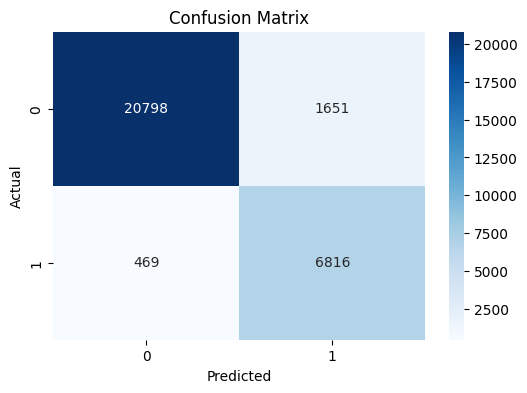

In [24]:
confusion(y_test, y_pred_knn)

In [25]:
report_knn = classification_report(y_test, y_pred_knn)
print("KNN Classification Report:")
print(report_knn)

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95     22449
           1       0.81      0.94      0.87      7285

    accuracy                           0.93     29734
   macro avg       0.89      0.93      0.91     29734
weighted avg       0.94      0.93      0.93     29734



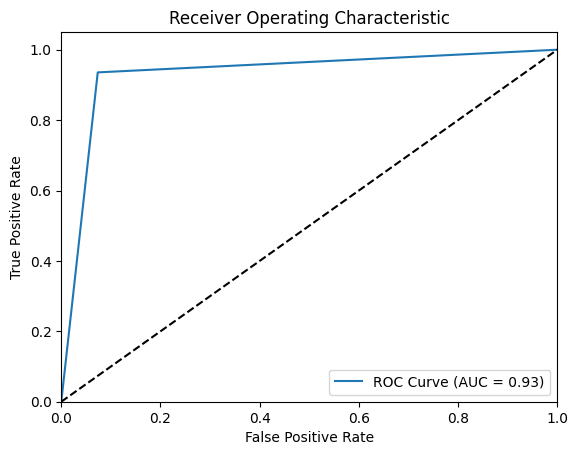

In [26]:
roc (y_test, y_pred_knn)

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [28]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print(f"Random Forest f1-score: {rf_f1 * 100:.2f}%")

Random Forest Accuracy: 99.99%
Random Forest f1-score: 99.99%


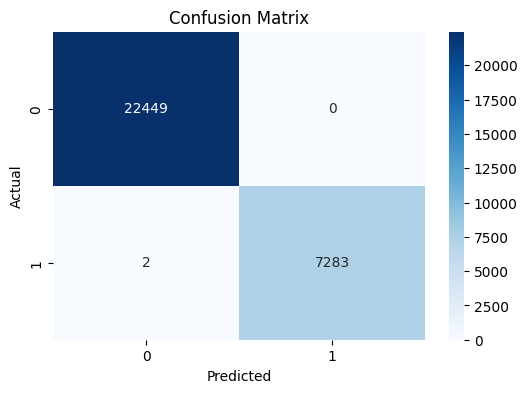

In [29]:
confusion(y_test, y_pred_rf)

In [30]:
report_rf = classification_report(y_test, y_pred_rf)
print("RF Classification Report:")
print(report_rf)


RF Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22449
           1       1.00      1.00      1.00      7285

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



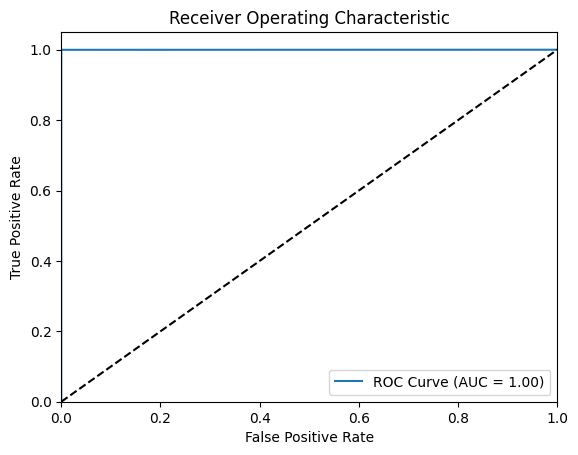

In [31]:
roc (y_test, y_pred_rf)

In [32]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred_dt = model.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)

In [33]:
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")
print(f"Decision Tree f1-score: {dt_f1 * 100:.2f}%")

Decision Tree Accuracy: 99.96%
Decision Tree f1-score: 99.92%


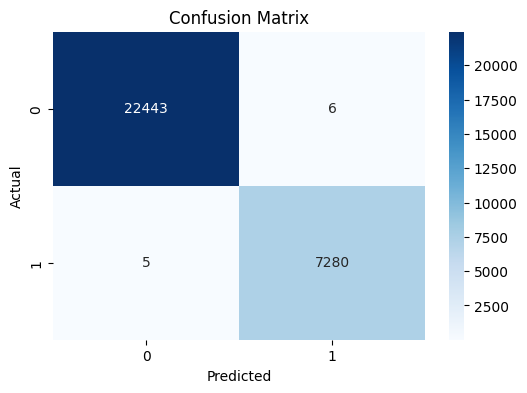

In [34]:
confusion(y_test, y_pred_dt)

In [35]:
report_dt = classification_report(y_test, y_pred_dt)
print("KNN Classification Report:")
print(report_dt)

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22449
           1       1.00      1.00      1.00      7285

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



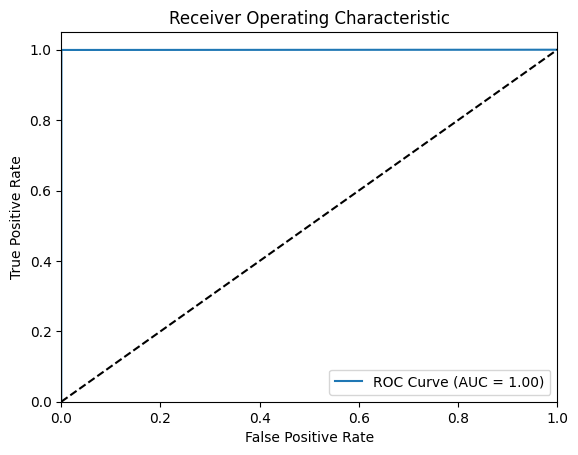

In [36]:
roc (y_test, y_pred_dt)

In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred_lr = model.predict(X_test)

In [38]:
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

print(f"Logistic Regression Accuracy: {lr_accuracy * 100:.2f}%")
print(f"Logistic Regression f1-score: {lr_f1 * 100:.2f}%")

Logistic Regression Accuracy: 75.50%
Logistic Regression f1-score: 0.00%


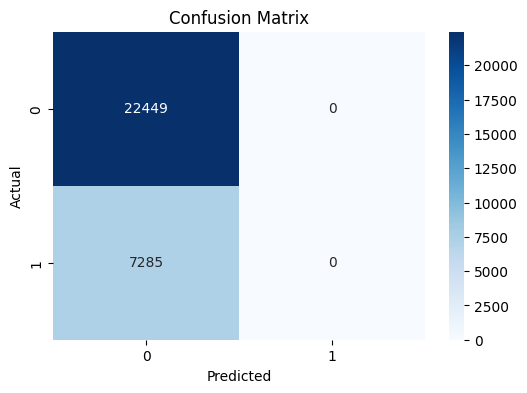

In [39]:
confusion(y_test, y_pred_lr)

In [40]:
report_lr = classification_report(y_test, y_pred_lr, zero_division=1)
print("Logistic Regression Classification Report:")
print(report_lr)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     22449
           1       1.00      0.00      0.00      7285

    accuracy                           0.75     29734
   macro avg       0.88      0.50      0.43     29734
weighted avg       0.82      0.75      0.65     29734



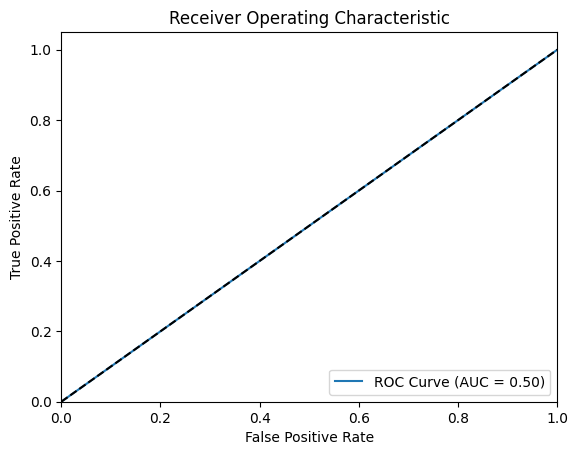

In [41]:
roc (y_test, y_pred_lr)

In [42]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_gnb=gnb.predict(X_test)

In [43]:
gnb_accuracy = accuracy_score(y_test, y_pred_gnb)
gnb_f1 = f1_score(y_test, y_pred_gnb)

print(f"Gaussian Naive Bayes Accuracy: {gnb_accuracy * 100:.2f}%")
print(f"Gaussian Naive Bayes f1-score: {gnb_f1 * 100:.2f}%")

Gaussian Naive Bayes Accuracy: 90.87%
Gaussian Naive Bayes f1-score: 84.21%


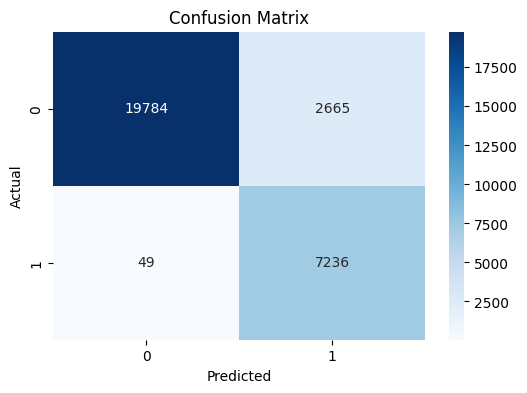

In [44]:
confusion (y_test, y_pred_gnb)

In [45]:
# Print GNB classification report
report_gnb = classification_report(y_test, y_pred_gnb)
print("GNB Classification Report:")
print(report_gnb)

GNB Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     22449
           1       0.73      0.99      0.84      7285

    accuracy                           0.91     29734
   macro avg       0.86      0.94      0.89     29734
weighted avg       0.93      0.91      0.91     29734



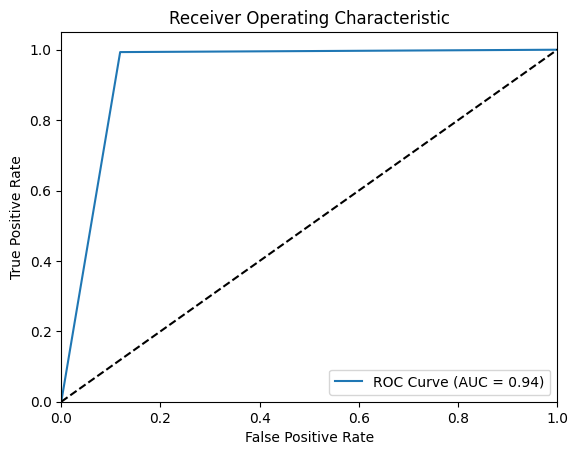

In [46]:
roc (y_test, y_pred_gnb)

In [47]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

optimizers = Adam(learning_rate=0.001)
model.compile(optimizer=optimizers,  
              loss='binary_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', 
                                   patience=20,
                                   restore_best_weights=True)

history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=100, 
                    batch_size=20,
                    validation_split=0.3,
                    shuffle=True,
                    verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:    ", loss)
print("Accuracy:", accuracy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1792      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6017 (23.50 KB)
Trainable params: 6017 (23.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
4163/4163 [==============================] - 22s 5ms/step - loss: 215.3452 - accuracy: 0.6413 - val_loss: 45.1104 - val_accuracy: 0.6068
Epoch 2/100
4163/4163 [==============================] - 19s 5ms/step - loss: 71.4099 - accuracy: 0.6930 - val_loss: 74.6609 - val_accura

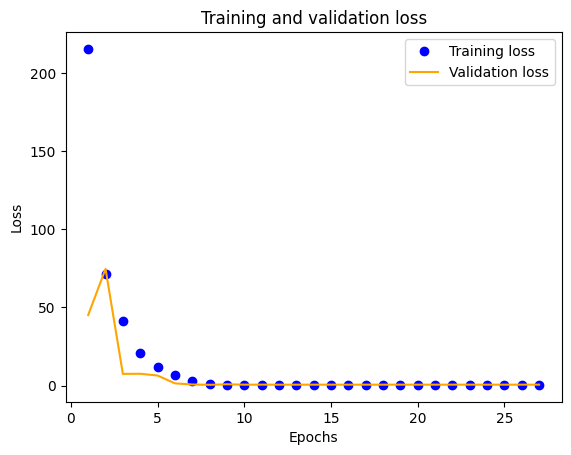

In [48]:
history_dict = history.history

loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 

epochs = range(1, len(loss_values) + 1) 

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

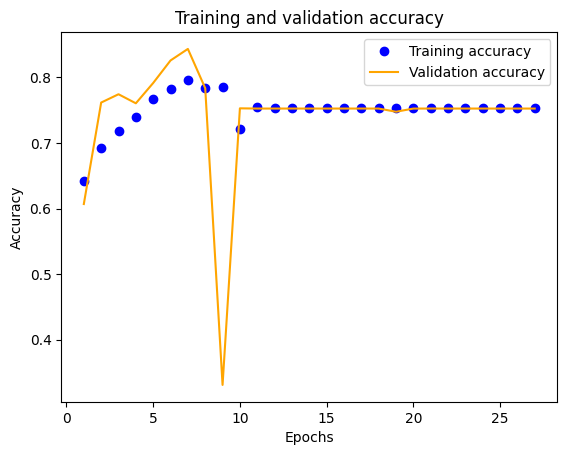

0.8432499170303345

In [49]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')

plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

np.max(val_acc)

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds = np.round(model.predict(X_test),0)

print(confusion_matrix(y_test, preds)) 

print("Neural Network Classification Report:")
print(classification_report(y_test, preds))


930/930 [==============================] - 3s 3ms/step
[[20434  2015]
 [ 2747  4538]]
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     22449
           1       0.69      0.62      0.66      7285

    accuracy                           0.84     29734
   macro avg       0.79      0.77      0.78     29734
weighted avg       0.84      0.84      0.84     29734



In [51]:
nn_accuracy = accuracy_score(y_test, preds)
nn_f1 = f1_score(y_test, preds)

print(f"Neural Network Accuracy: {nn_accuracy * 100:.2f}%")
print(f"Neural Network f1-score: {nn_f1 * 100:.2f}%")

Neural Network Accuracy: 83.98%
Neural Network f1-score: 65.59%


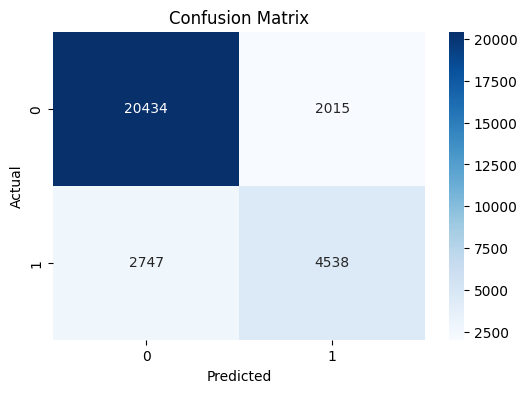

In [52]:
confusion (y_test, preds)

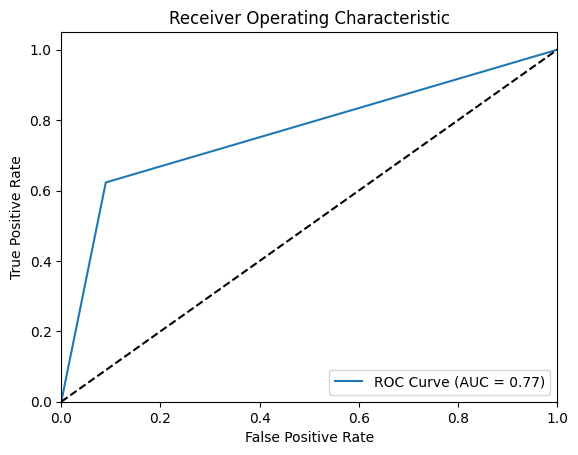

In [53]:
roc (y_test, preds)